In [1]:
from IPython.display import HTML, display
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

In [2]:
# Stock tickers
S_P500 = "^GSPC"
STOCKS = [
    "AAPL",
    "AMZN"
]
SYMBOLS = [S_P500] + STOCKS

In [3]:
# Date range
END_DATE = datetime.now()
START_DATE = END_DATE.replace(year=END_DATE.year-20)

In [4]:
# Returns stock data from provided date range
def get_stocks_data(symbols, from_date=START_DATE, to_date=END_DATE, keep=["Adj Close"]):
    if isinstance(symbols, str):
        df = web.DataReader(symbols, "yahoo", from_date, to_date)[keep]
        return df.rename(columns={column: (F"{symbols} {column}" if len(keep) > 1 else symbols) for column in df})
    elif isinstance(symbols, list):
        if symbols:
            df = web.DataReader(symbols[0], "yahoo", from_date, to_date)[keep]
            df.rename(columns={column: (F"{symbols[0]} {column}" if len(keep) > 1 else symbols[0]) for column in df}, inplace=True)
            for s in symbols[1:]:
                temp = web.DataReader(s, "yahoo", from_date, to_date)[keep]
                temp.rename(columns={column: (F"{s} {column}" if len(keep) > 1 else s) for column in temp}, inplace=True)

                df = pd.merge(df, temp, how="inner", on="Date")
            return df
        else: raise ValueError("list of 'symbols' must not be empty")
    else:
        raise TypeError("'symbols' must be either a string or list of symbols")

In [5]:
stock_data = get_stocks_data(SYMBOLS).sort_index()
display(HTML(stock_data.head().to_html()))

,^GSPC,AAPL,AMZN
Date,,,
2002-05-14,1097.280029,0.391018,18.809999
2002-05-15,1091.069946,0.385980,19.940001
2002-05-16,1098.229980,0.384911,19.610001
2002-05-17,1106.589966,0.381857,19.160000
2002-05-20,1091.880005,0.377735,19.389999


In [6]:
# Compute daily stock log returns per day
K_daily = np.log(stock_data / stock_data.shift(1))
display(HTML(K_daily.head().to_html()))

,^GSPC,AAPL,AMZN
Date,,,
2002-05-14,NaN,NaN,NaN
2002-05-15,-0.005676,-0.012968,0.058339
2002-05-16,0.006541,-0.002773,-0.016688
2002-05-17,0.007583,-0.007966,-0.023215
2002-05-20,-0.013382,-0.010853,0.011933


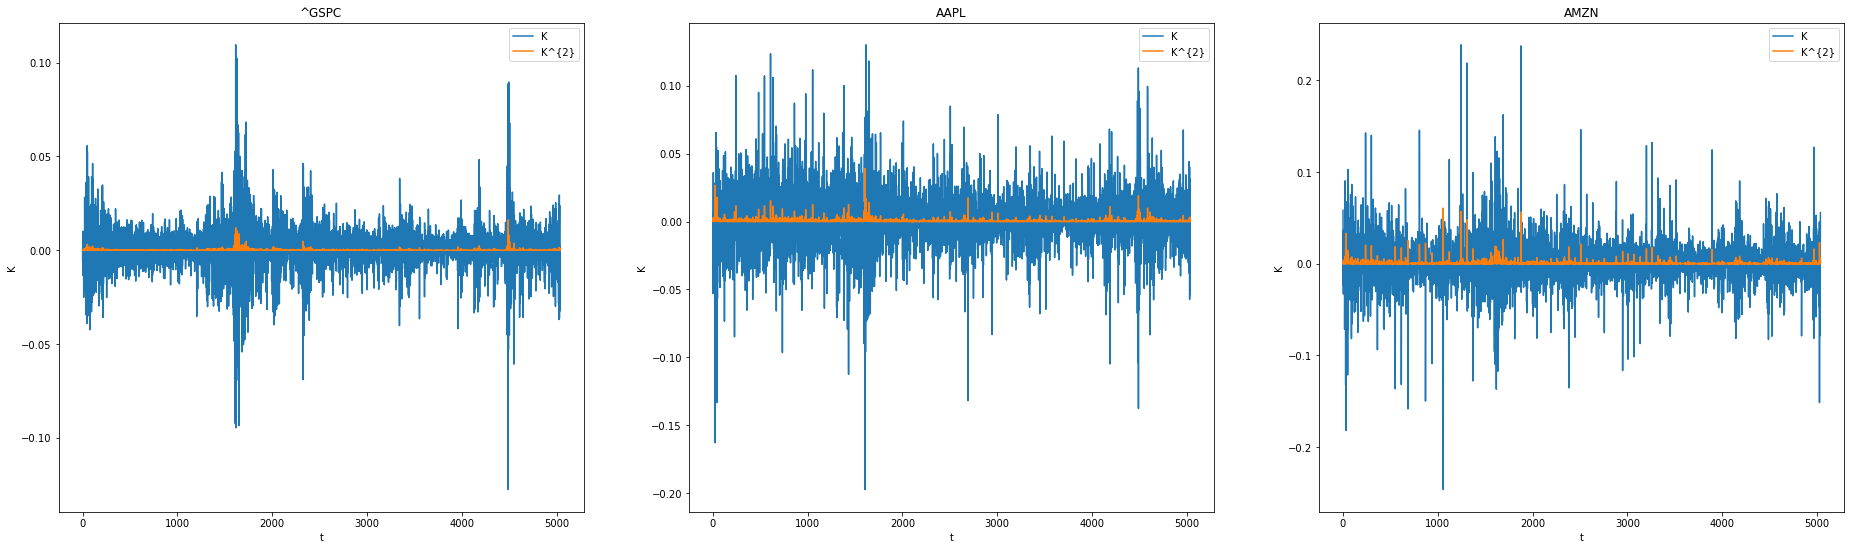

In [7]:
plt.figure(figsize=(32, 9))
for i, symbol in enumerate(SYMBOLS):
    plt.subplot(1, len(SYMBOLS), i+1)
    plt.plot(K_daily.loc[~pd.isnull(K_daily[symbol]), symbol].values, label="K")
    plt.plot(K_daily.loc[~pd.isnull(K_daily[symbol]), symbol].values ** 2, label="K^{2}")
    plt.title(symbol)
    plt.legend(loc="best")
    plt.xlabel("t")
    plt.ylabel("K")